<a href="https://colab.research.google.com/github/Nohgyumin0812/FactorAnalysis/blob/main/factor_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
from datetime import datetime
from google.colab import drive
import numpy as np
import itertools
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/factor_analysis.csv', header=[0, 1])
company_list = list(df.columns.levels[0])
print(company_list)
company_list.remove('Name')
date_column = df['Name']['Date']
company_num = df.shape[0]
df.iloc[:, 1:] = df.iloc[:, 1:].replace({'적전': -1}, regex=True).replace({'적지': -1}, regex=True).replace({'흑전': 1}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].replace({',': ''}, regex=True)
df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)


<ipython-input-3-7722304a510c>:1: DtypeWarning: Columns (12,17,24,148,177,184,217,224,250,252,273,276,280,324,353,360,370,372,378,380,394,412,417,418,420,424,433,436,440,450,465,466,468,472,545,548,552,572,594,596,618,620,652,682,684,716,761,768,786,788,809,816,836,844,865,872,884,980,988,1036,1057,1060,1064,1068,1140,1148,1156,1172,1180,1212,1282,1284,1345,1352,1410,1412,1420,1444,1452,1492,1500,1505,1512,1548,1585,1588,1592,1604,1660,1681,1688,1697,1704,1708,1721,1728,1732,1748,1756,1764,1788,1820,1836,1905,1908,1912,1932,1964,1988,2001,2008,2025,2032,2060,2076,2121,2128,2140,2148,2161,2164,2168,2169,2176,2186,2188,2217,2224,2229,2273,2280,2298,2300,2316,2321,2324,2328,2364,2370,2372,2380,2401,2408,2428,2492,2516,2540,2545,2552,2700,2715,2722,2724,2730,2732,2772,2801,2808,2844,2868,2881,2888,2908,2924,2929,2936,2954,2964,3012,3017,3024,3028,3029,3041,3076,3092,3116,3148,3153,3160,3172,3209,3210,3212,3216,3233,3240,3289,3296,3305,3308,3312,3380,3425,3426,3428,3432,3444,3468,3492,3505,

['3S', 'AJ네트웍스', 'AK홀딩스', 'APS', 'AP시스템', 'AP위성', 'BGF', 'BGF리테일', 'BGF에코머티리얼즈', 'BNK금융지주', 'BYC', 'CG인바이츠', 'CJ', 'CJ CGV', 'CJ ENM', 'CJ 바이오사이언스', 'CJ대한통운', 'CJ씨푸드', 'CJ제일제당', 'CJ프레시웨이', 'CMG제약', 'CR홀딩스', 'DB', 'DB금융투자', 'DB손해보험', 'DB하이텍', 'DGB금융지주', 'DI동일', 'DL', 'DL건설', 'DL이앤씨', 'DMS', 'DN오토모티브', 'DRB동일', 'DS단석', 'DXVX', 'E1', 'EG', 'F&F', 'F&F홀딩스', 'FSN', 'GKL', 'GRT', 'GS', 'GST', 'GS건설', 'GS글로벌', 'GS리테일', 'HB솔루션', 'HB테크놀러지', 'HDC', 'HDC랩스', 'HDC현대EP', 'HDC현대산업개발', 'HD한국조선해양', 'HD현대', 'HD현대건설기계', 'HD현대에너지솔루션', 'HD현대인프라코어', 'HD현대일렉트릭', 'HD현대중공업', 'HJ중공업', 'HK이노엔', 'HLB', 'HLB글로벌', 'HLB바이오스텝', 'HLB생명과학', 'HLB이노베이션', 'HLB제약', 'HLB테라퓨틱스', 'HLB파나진', 'HL만도', 'HL홀딩스', 'HMM', 'HPSP', 'HSD엔진', 'HS애드', 'ISC', 'JB금융지주', 'JTC', 'JW생명과학', 'JW신약', 'JW중외제약', 'JW홀딩스', 'JYP Ent.', 'KB금융', 'KCC', 'KCC건설', 'KCC글라스', 'KCTC', 'KEC', 'KG ETS', 'KG모빌리언스', 'KG모빌리티', 'KG스틸', 'KG이니시스', 'KG케미칼', 'KH 필룩스', 'KH바텍', 'KIB플러그에너지', 'KISCO홀딩스', 'KNN', 'KPX케미칼', 'KPX홀딩스', 'KSS해운', 'KT', 'KT&G', 'KTcs', 'KTis', 'KX

<ipython-input-3-7722304a510c>:7: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].replace({'적전': -1}, regex=True).replace({'적지': -1}, regex=True).replace({'흑전': 1}, regex=True)
<ipython-input-3-7722304a510c>:9: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  df.iloc[:, 1:] = df.iloc[:, 1:].astype(float)


In [4]:
new_columns= {}
for company in company_list:
  df.loc[:, (company, '수정주가(원)')] =  df.loc[:, (company, '수정주가(원)')].pct_change(5)

  try: # p/e, 시총같이 역수가 더 투자적합한 것
    df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')] = 1 / df.loc[:, (company, 'PER (E3, 12M Fwd)(배)')]
    df.loc[:, (company, '시가총액 (티커-상장예정주식수 미포함)(백만원)')] = 1 / df.loc[:, (company, '시가총액 (티커-상장예정주식수 미포함)(백만원)')]
    df.loc[:, (company, '변동성 (W,1Yr)')] = 1 / df.loc[:, (company, '변동성 (W,1Yr)')]
  except:
    pass
  df[(company,'날짜')]= date_column
df = df.stack(level=0).reset_index()
df = df.drop(columns = 'Date').reset_index(drop=True)
df

<ipython-input-4-86d8cf7f7e5c>:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df[(company,'날짜')]= date_column


,level_0,level_1,EPS 증가율 (E3)(%),"PER (E3, 12M Fwd)(배)",Payout Ratio (E3)(%),ROE(영업이익) (E3)(%),날짜,"변동성 (W,1Yr)",수익률 (3개월)(%),수정주가(원),시가총액 (티커-상장예정주식수 미포함)(백만원)
0,0,3S,NaN,NaN,NaN,NaN,2021-03-01,1.713620,12.03,NaN,9.397966e-06
1,0,AJ네트웍스,NaN,NaN,NaN,NaN,2021-03-01,1.279132,-14.90,NaN,5.497375e-06
2,0,AK홀딩스,NaN,NaN,NaN,NaN,2021-03-01,1.633266,44.34,NaN,2.415541e-06
3,0,APS,NaN,NaN,NaN,NaN,2021-03-01,1.371573,0.00,NaN,6.351505e-06
4,0,AP시스템,NaN,0.083898,NaN,NaN,2021-03-01,2.259274,20.51,NaN,2.448928e-06
...,...,...,...,...,...,...,...,...,...,...,...
1634201,1032,휴젤,82.62,0.055357,NaN,14.13,2023-12-28,2.625154,19.52,0.011510,5.404275e-07
1634202,1032,흥구석유,NaN,NaN,NaN,NaN,2023-12-28,1.062507,9.74,0.005025,8.333333e-06
1634203,1032,흥국화재,NaN,NaN,NaN,NaN,2023-12-28,3.727449,0.82,0.009868,5.070351e-06
1634204,1032,흥아해운,NaN,NaN,NaN,NaN,2023-12-28,1.372646,54.80,-0.042146,1.663722e-06


In [13]:
new_columns_name = ['level_0', 'level_1', 'EPS_chg','E/P','Div', 'ROE', '날짜', '1/Vol','Momentum_3mo','수익률', 'Market_cap']
df.columns = new_columns_name

stack_condition = df['날짜'] == date_column.tolist()[-1]
factor_stack = df.loc[stack_condition]
factor_stack.to_excel('/content/drive/MyDrive/factor_stack.xlsx')

         level_0 level_1  EPS_chg       E/P     Div    ROE          날짜  \
1632624     1032      3S      NaN       NaN     NaN    NaN  2023-12-28   
1632625     1032  AJ네트웍스     5.68  0.127797  129.98  22.20  2023-12-28   
1632626     1032   AK홀딩스      NaN       NaN     NaN    NaN  2023-12-28   
1632627     1032     APS      NaN       NaN     NaN    NaN  2023-12-28   
1632628     1032   AP시스템   -22.78  0.261172    5.01  20.84  2023-12-28   
...          ...     ...      ...       ...     ...    ...         ...   
1634201     1032      휴젤    82.62  0.055357     NaN  14.13  2023-12-28   
1634202     1032    흥구석유      NaN       NaN     NaN    NaN  2023-12-28   
1634203     1032    흥국화재      NaN       NaN     NaN    NaN  2023-12-28   
1634204     1032    흥아해운      NaN       NaN     NaN    NaN  2023-12-28   
1634205     1032      희림      NaN       NaN     NaN    NaN  2023-12-28   

            1/Vol  Momentum_3mo       수익률    Market_cap  
1632624  2.556564          9.33  0.000000  8.375209e-

In [92]:
condition_Market_cap = df['Market_cap']> 1/300000  #시가총액 3000억이상
df.loc[condition_Market_cap, 'Market_cap'] = np.nan


condition_vol = df['1/Vol'] == np.inf
df.loc[condition_vol, '1/Vol'] = np.nan


In [94]:
portfolio = {'Date' : {}, 'Factor' : '', 'cum_ret' : 1, 'weekly_ret': 0 , 'long_holdings' : {}, 'short_holdings' : {}}
cum_return = []
weekly_return = []


def get_top_bottom_factor(factor, date, select_num):
  condition = df['날짜'] == date
  factor_filtered_df = df.loc[condition]
  factor_today = factor_filtered_df.loc[:, ('level_1',factor)]
  top = factor_today.nlargest(select_num, factor)['level_1'].tolist()
  bottom =  factor_today.nsmallest(select_num, factor)['level_1'].tolist()

  return top, bottom

def buy_sell(date,next_date, top, bottom, select_num, factor, cum_return):

  portfolio['long_holdings'] = {}
  portfolio['short_holdings'] = {}

  condition = df['날짜'] == next_date
  price_filtered_df = df.loc[condition]
  for company in top:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['long_holdings'][company] = price_filtered_df.loc[condition_2]['수익률'].tolist()[0]

  for company in bottom:
    condition_2 = price_filtered_df['level_1'] == company
    portfolio['Date'] = next_date
    portfolio['short_holdings'][company] = price_filtered_df.loc[condition_2]['수익률'].tolist()[0]

  portfolio['weekly_ret'] = round((sum(portfolio['long_holdings'].values()) / select_num - sum(portfolio['short_holdings'].values()) / select_num), 3)
  if portfolio['Date'] == date_column[5] :
    portfolio['cum_ret'] = 100
  portfolio['cum_ret'] *= (1 + portfolio['weekly_ret'])
  portfolio['cum_ret'] = round(portfolio['cum_ret'], 3)
  cum_return.append(portfolio['cum_ret'])
  weekly_return.append(portfolio['weekly_ret'])
  portfolio['Factor'] = factor
  return cum_return, weekly_return, portfolio



In [95]:
dates = date_column[::5].to_list()
figure_dic_cum = {}
figure_dic_weekly = {}

factor_lst = [ 'EPS_chg','E/P','Div', 'ROE', '1/Vol','Momentum_3mo', 'Market_cap']
for factor in factor_lst:
  cum_return = []
  weekly_return = []
  for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)

    print(portfolio)

  name_cum = '%s_cum' % factor
  name_weekly = '%s_weekly' % factor
  figure_dic_cum[name_cum] = cum_return
  figure_dic_weekly[name_weekly] = weekly_return


figure_dic_cum['Date'] = pd.to_datetime(dates[1:])
figure_df_cum = pd.DataFrame(figure_dic_cum).set_index('Date')
figure_dic_weekly['Date'] = pd.to_datetime(dates[1:])
figure_df_weekly = pd.DataFrame(figure_dic_weekly).set_index('Date')

{'Date': '2021-03-06', 'Factor': 'EPS_chg', 'cum_ret': 102.2, 'weekly_ret': 0.022, 'long_holdings': {'SK이노베이션': -0.03262731206036229, '옵트론텍': -0.034594594594594574, '호텔신라': 0.02450980392156854, 'NAVER': 0.006666666666666599, '컴투스': 0.014450867052023142, '현대미포조선': -0.033333333333333326, '한국항공우주': 0.007552870090634434, '한국전력': 0.013215859030837107, '상아프론테크': 0.0033185840707965486, '지니언스': 0.09922480620155039}, 'short_holdings': {'SK하이닉스': -0.010600706713780883, '넷마블': -0.0080971659919028, '대한유화': -0.03301237964236592, '키움증권': -0.04263565891472865, '아이에스동서': 0.005586592178770999, 'KT&G': 0.017879948914431676, '한국토지신탁': -0.030952380952380953, '효성티앤씨': 0.06569343065693434, '현대홈쇼핑': -0.03270440251572326, '한화시스템': -0.08569450362164466}}
{'Date': '2021-03-11', 'Factor': 'EPS_chg', 'cum_ret': 103.937, 'weekly_ret': 0.017, 'long_holdings': {'SK이노베이션': -0.04166868315346273, '옵트론텍': -0.027995520716685318, '호텔신라': -0.0035885167464114742, 'NAVER': -0.01059602649006619, '컴투스': -0.029202279202279247, 

In [81]:
# 특정 지표 백테스팅
"""
factor = 'Div'
cum_return = []
weekly_return = []
for i in range(0, len(dates) -1):
    select_num = 10
    date = dates[i]
    next_date = dates[i+1]
    top, bottom = get_top_bottom_factor(factor, date, select_num)
    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)
    print(portfolio)

dates = date_column[::5].to_list()
new_figure_dic_cum = {}
new_figure_dic_weekly = {}

new_name_cum = '%s_cum' % factor
new_name_weekly = '%s_weekly' % factor
new_figure_dic_cum[new_name_cum] = cum_return
new_figure_dic_weekly[new_name_weekly] = weekly_return"""


"\nfactor = 'Div'\ncum_return = []\nweekly_return = []\nfor i in range(0, len(dates) -1):\n    select_num = 10\n    date = dates[i]\n    next_date = dates[i+1]\n    top, bottom = get_top_bottom_factor(factor, date, select_num)\n    cum_return, weekly_return, portfolio = buy_sell(date,next_date, top, bottom, select_num, factor, cum_return)\n    print(portfolio)\n\ndates = date_column[::5].to_list()\nnew_figure_dic_cum = {}\nnew_figure_dic_weekly = {}\n\nnew_name_cum = '%s_cum' % factor\nnew_name_weekly = '%s_weekly' % factor\nnew_figure_dic_cum[new_name_cum] = cum_return\nnew_figure_dic_weekly[new_name_weekly] = weekly_return"

<Axes: xlabel='Date'>

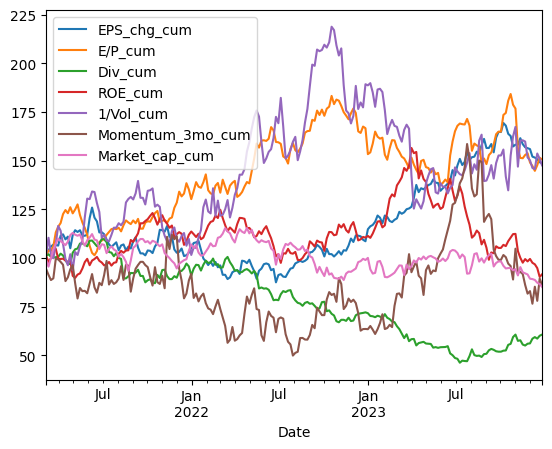

In [96]:
figure_df_cum.plot()

<ipython-input-97-97c174b0b146>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  yr1_weekly[new_name_weekly] = (1 + yr1_weekly[new_name_weekly]).cumprod()


            EPS_chg_weekly  E/P_weekly  Div_weekly  ROE_weekly  1/Vol_weekly  \
Date                                                                           
2023-01-05        1.013000    1.006000    0.980000    0.991000      1.006000   
2023-01-10        1.019078    1.035174    0.978040    1.010820      0.980850   
2023-01-15        1.033345    1.075546    0.971194    1.037101      0.941616   
2023-01-20        1.061245    1.058337    0.981877    1.066140      0.988697   
2023-01-25        1.051694    1.051987    0.975986    1.068272      0.990674   
...                    ...         ...         ...         ...           ...   
2023-12-06        1.324681    0.960374    0.817141    0.875988      0.775073   
2023-12-11        1.320706    0.944047    0.828581    0.868980      0.771973   
2023-12-16        1.312782    0.962928    0.817809    0.851601      0.814432   
2023-12-21        1.299654    0.987964    0.838255    0.810724      0.799772   
2023-12-26        1.295755    0.982037  

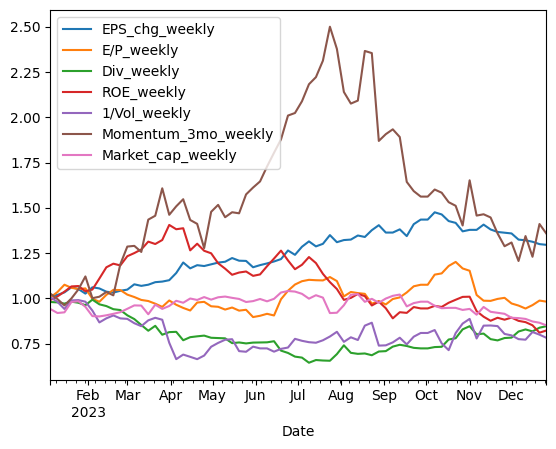

In [97]:
yr1_weekly = figure_df_weekly['2023-1-01':]
for factor in factor_lst:
  new_name_weekly = '%s_weekly' % factor
  yr1_weekly[new_name_weekly] = (1 + yr1_weekly[new_name_weekly]).cumprod()

print(yr1_weekly)
print(yr1_weekly.plot())

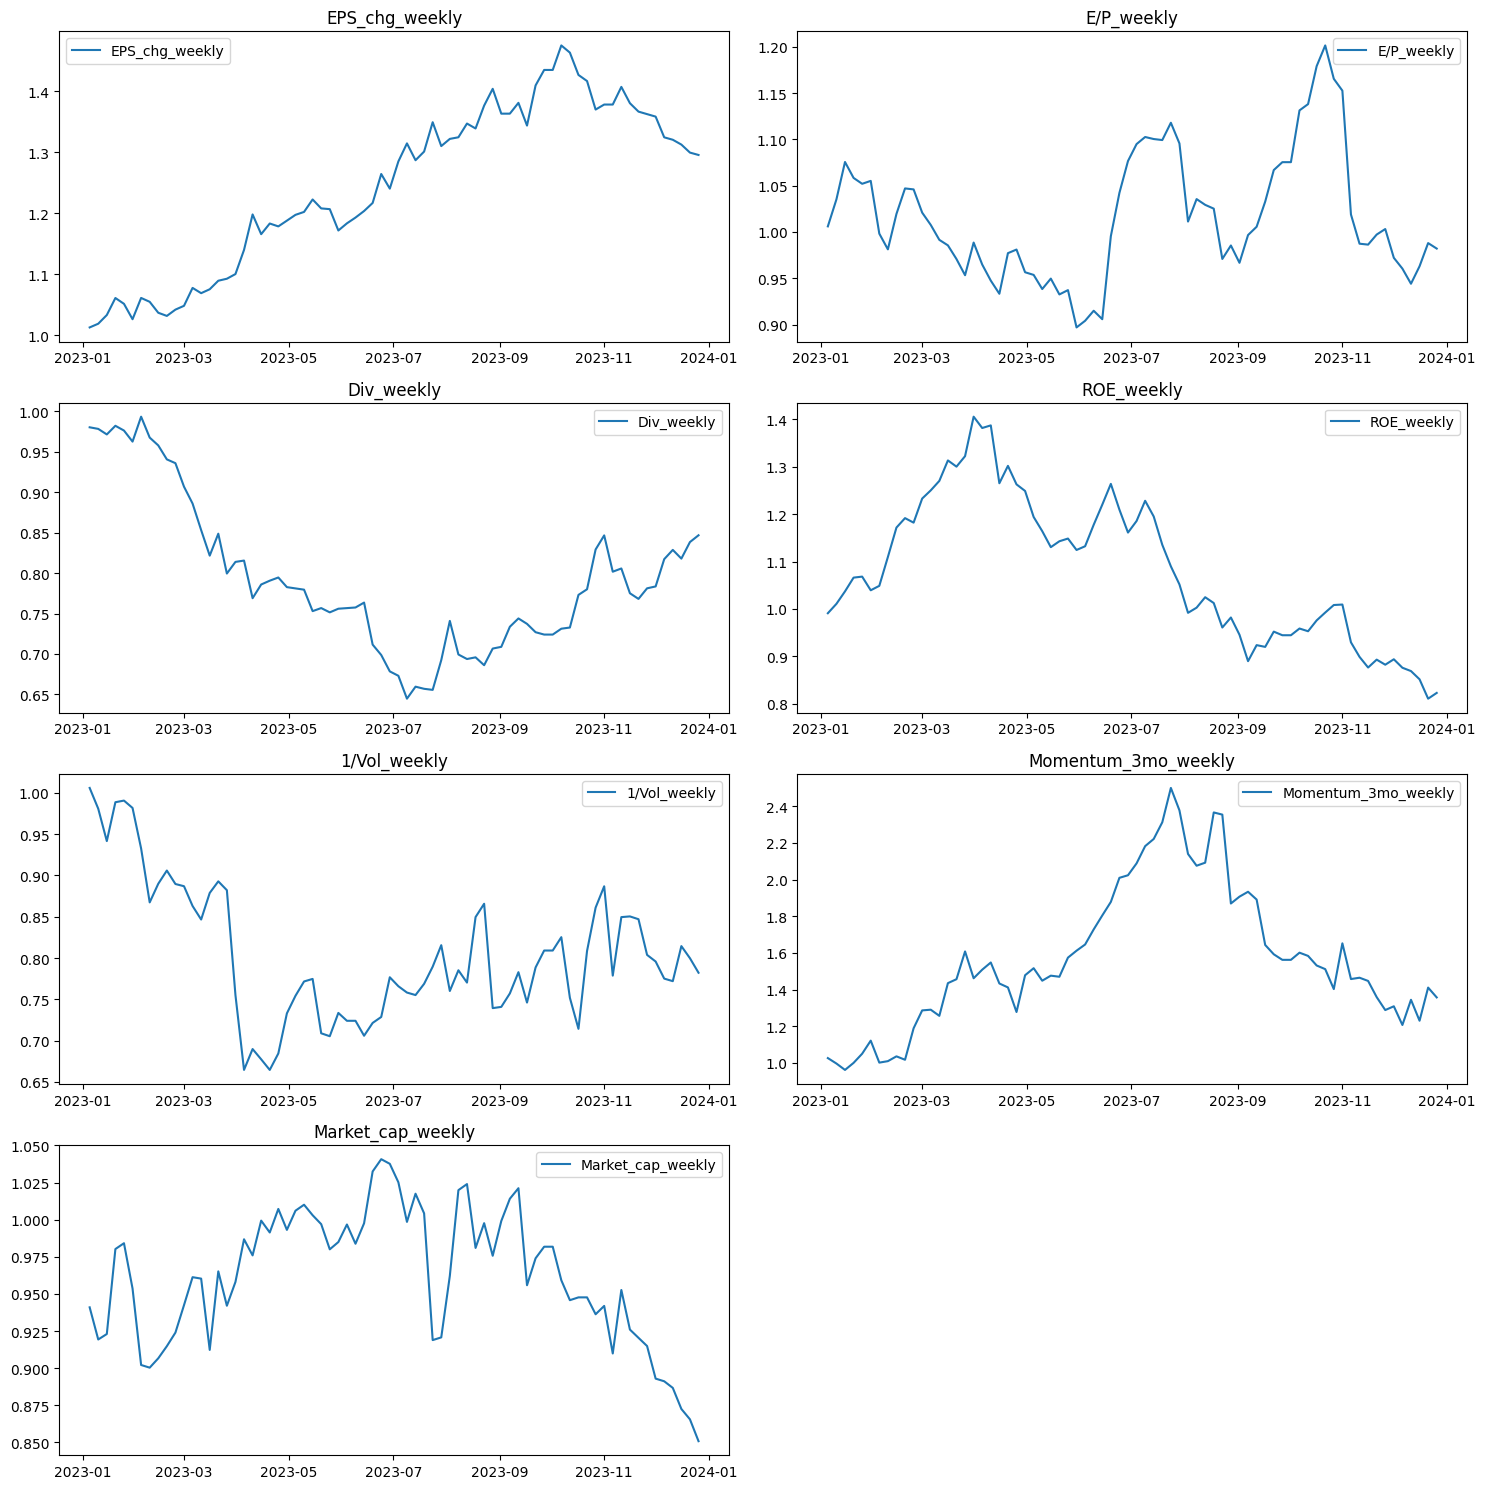

In [98]:
# 최근 1년 성과
import matplotlib.pyplot as plt

# yr1_weekly 데이터프레임에서 각 열에 대한 서브플롯 생성
fig, axes = plt.subplots(4, 2, figsize=(15, 15))

# 데이터프레임의 열에 대해 순회하며 서브플롯에 선 그래프 플로팅 (총 7개의 서브플롯)
for i, column in enumerate(yr1_weekly.columns[:7]):
    row, col = divmod(i, 2)
    axes[row, col].plot(yr1_weekly.index, yr1_weekly[column], label=column)
    axes[row, col].set_title(column)
    axes[row, col].legend()

# 남은 서브플롯 비우기
for i in range(7, 8):
    fig.delaxes(axes.flatten()[i])

plt.tight_layout()
plt.show()


In [106]:
!pip install finance-datareader
!pip install yfinance
import yfinance as yf
import FinanceDataReader as fdr

up_down_label = ['하락', '약간 하락', '약간 상승', '상승']
kospi = pd.DataFrame(fdr.DataReader('KS11', '2022-12-01')['Close'])
dollar = pd.DataFrame(fdr.DataReader('USD/KRW', '2022-12-01')['Close'])
tbondrate = pd.DataFrame(yf.download('^TNX',  '2022-12-01')['Adj Close'])

macro_list = ['kospi', 'dollar', 'tbondrate']
macro_df = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)

macro_df = macro_df.pct_change(5)
macro_df.columns = macro_list
factor_sys = pd.DataFrame()

for columns in macro_df.columns:
  macro_df[columns] = pd.qcut(macro_df[columns], q=4, labels= up_down_label)
  macro_df[columns] = macro_df[columns].shift(1)

factor_sys = figure_df_weekly.merge(macro_df, left_index = True, right_index = True )
print(factor_sys.head())

[*********************100%%**********************]  1 of 1 completed
            EPS_chg_weekly  E/P_weekly  Div_weekly  ROE_weekly  1/Vol_weekly  \
Date                                                                           
2022-12-01          -0.016       0.014       0.004       0.016         0.023   
2022-12-06           0.031      -0.013       0.040      -0.038         0.089   
2022-12-16          -0.003      -0.005       0.004       0.005         0.019   
2022-12-21          -0.016       0.020       0.003       0.011        -0.014   
2023-01-05           0.013       0.006      -0.020      -0.009         0.006   

            Momentum_3mo_weekly  Market_cap_weekly  kospi dollar tbondrate  
Date                                                                        
2022-12-01                0.015              0.009    NaN    NaN       NaN  
2022-12-06               -0.022              0.009    NaN    NaN       NaN  
2022-12-16               -0.126              0.005  약간 하락     

In [103]:
"""for macro in macro_list:
  for factor in factor_lst:
    for up_down in up_down_label:
      factor_name = "%s_weekly" %(factor)
      condition_sys = factor_sys[macro]==up_down
      mean = round(factor_sys[condition_sys][factor_name].mean(),3)
      print('사용된 팩터', factor,'/ 사용된 매크로:', macro, '/ 국면 :', up_down, "/ 평균 사후수익률:", round(mean * 100,2), "%")"""

'for macro in macro_list:\n  for factor in factor_lst:\n    for up_down in up_down_label:\n      factor_name = "%s_weekly" %(factor)\n      condition_sys = factor_sys[macro]==up_down\n      mean = round(factor_sys[condition_sys][factor_name].mean(),3)\n      print(\'사용된 팩터\', factor,\'/ 사용된 매크로:\', macro, \'/ 국면 :\', up_down, "/ 평균 사후수익률:", round(mean * 100,2), "%")'

In [116]:
import statsmodels.api as sm
from statsmodels.tsa.api import VAR
from statsmodels.tsa.stattools import adfuller
import seaborn as sns
##VAR 모델에 따른 검정##
macro_df_var = kospi.merge(dollar, left_index= True, right_index = True).merge(tbondrate, left_index = True, right_index = True)
macro_df_var = macro_df_var.pct_change(5)
macro_df_var.columns = macro_list
factor_sys_var = pd.DataFrame()

for columns in macro_df.columns:
  macro_df_var[columns] = macro_df_var[columns].shift(1)

factor_sys_var = figure_df_weekly.merge(macro_df_var, left_index = True, right_index = True )
train_rate = 0.7
for factor in factor_lst:
  factor = factor + '_weekly'
  ex_df = factor_sys_var[[factor,	'kospi',	'dollar'	,'tbondrate']]

  #ADF test
  ex_df = ex_df.loc['2023-01-01':]
  model = VAR(ex_df)

  model_fit = model.fit()

  # 모델 요약 정보 출력
  coefficients = model_fit.params
  c = round(coefficients[factor][0], 6)
  A_EBIT = round(coefficients[factor][1], 6)
  A_kospi = round(coefficients[factor][2], 6)
  A_dollar = round(coefficients[factor][3], 6)
  A_tbondrate = round(coefficients[factor][4], 6)

  # 선형 방정식
  equation = f"{factor}(t) = {c} + {A_EBIT}*{factor}(t-1) + {A_kospi}*kospi(t-1) + {A_dollar}*dollar(t-1) + {A_tbondrate}*tbondrate(t-1)"
  print("\n추정된 선형 방정식:",equation)

            Close_x      Close_y  Adj Close
Date                                       
2023-12-20  2614.30  1297.760010      3.877
2023-12-21  2600.02  1296.979980      3.894
2023-12-22  2599.51  1291.709961      3.901
2023-12-26  2602.59  1294.579956      3.886
2023-12-27  2613.50  1293.920044      3.789
2023-12-28  2655.28  1294.760010      3.850

추정된 선형 방정식: EPS_chg_weekly(t) = 0.002007 + 0.375751*EPS_chg_weekly(t-1) + 0.009177*kospi(t-1) + 0.298103*dollar(t-1) + -0.080677*tbondrate(t-1)

추정된 선형 방정식: E/P_weekly(t) = -0.003027 + -0.163904*E/P_weekly(t-1) + 0.101703*kospi(t-1) + -0.419511*dollar(t-1) + 0.109609*tbondrate(t-1)

추정된 선형 방정식: Div_weekly(t) = 0.001752 + 0.112943*Div_weekly(t-1) + -0.205734*kospi(t-1) + -0.189647*dollar(t-1) + -0.121191*tbondrate(t-1)

추정된 선형 방정식: ROE_weekly(t) = -0.003505 + 0.071212*ROE_weekly(t-1) + 0.499238*kospi(t-1) + 0.434216*dollar(t-1) + 0.038324*tbondrate(t-1)

추정된 선형 방정식: 1/Vol_weekly(t) = -0.006457 + 0.126726*1/Vol_weekly(t-1) + 0.672494*kospi(t

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


In [114]:
ex_df.tail(6)

,Market_cap_weekly,kospi,dollar,tbondrate
Date,,,,
2023-11-21,-0.006,0.036376,-0.019036,-0.045337
2023-12-01,-0.024,0.009392,-0.005273,-0.014493
2023-12-06,-0.002,-0.010897,0.004046,-0.038053
2023-12-11,-0.005,0.005126,0.012416,0.004496
2023-12-21,-0.008,0.041280,-0.009449,-0.038681
2023-12-26,-0.017,0.014023,-0.000163,-0.006874
